In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [9]:
df = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])
df.head()
df.shape

(891, 3)

In [10]:
df.dropna(inplace=True)
df.shape

(714, 3)

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
X = df.iloc[:,1:]
X

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [17]:
Y = df.iloc[:,0]
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42
                                                )

In [23]:
clf = DecisionTreeClassifier()

In [25]:
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)

In [27]:
accuracy_score(Y_test,y_pred)

0.6153846153846154

In [30]:
valid_score = cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')
np.mean(valid_score)

0.6274843505477309

In [53]:
kbin_age = KBinsDiscretizer(n_bins=15,strategy='quantile',encode='ordinal')
kbin_fare = KBinsDiscretizer(n_bins=15,strategy='quantile',encode='ordinal')

In [54]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [55]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [56]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=15),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=15)}

In [57]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.        ,   7.17166667,   7.77333333,   7.925     ,
                8.05      ,   9.5       ,  10.5       ,  13.        ,
               17.69333333,  22.62      ,  26.35276667,  31.275     ,
               38.1       ,  53.22666667,  79.27666667, 512.3292    ])],
      dtype=object)

In [58]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [59]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [60]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,8.0,20.5250,8.0,"(30.1, 33.667]","(17.693, 22.62]"
73,26.0,6.0,14.4542,7.0,"(24.0, 26.0]","(13.0, 17.693]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.1]","(13.0, 17.693]"
719,33.0,9.0,7.7750,2.0,"(30.1, 33.667]","(7.773, 7.925]"
666,25.0,6.0,13.0000,6.0,"(24.0, 26.0]","(10.5, 13.0]"
...,...,...,...,...,...,...
92,46.0,12.0,61.1750,12.0,"(44.067, 52.0]","(53.227, 79.277]"
134,25.0,6.0,13.0000,6.0,"(24.0, 26.0]","(10.5, 13.0]"
337,41.0,11.0,134.5000,14.0,"(38.6, 44.067]","(79.277, 512.329]"
548,33.0,9.0,20.5250,8.0,"(30.1, 33.667]","(17.693, 22.62]"


In [61]:
clf1 = DecisionTreeClassifier()

In [62]:
clf1.fit(X_train_trf,Y_train)
y_pred = clf1.predict(X_test_trf)

In [63]:
accuracy_score(Y_test,y_pred)

0.6503496503496503

In [64]:
np.mean(cross_val_score(DecisionTreeClassifier(),X_train_trf,Y_train,cv=10,scoring='accuracy'))

0.6935269207501512

In [74]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.624706572769953


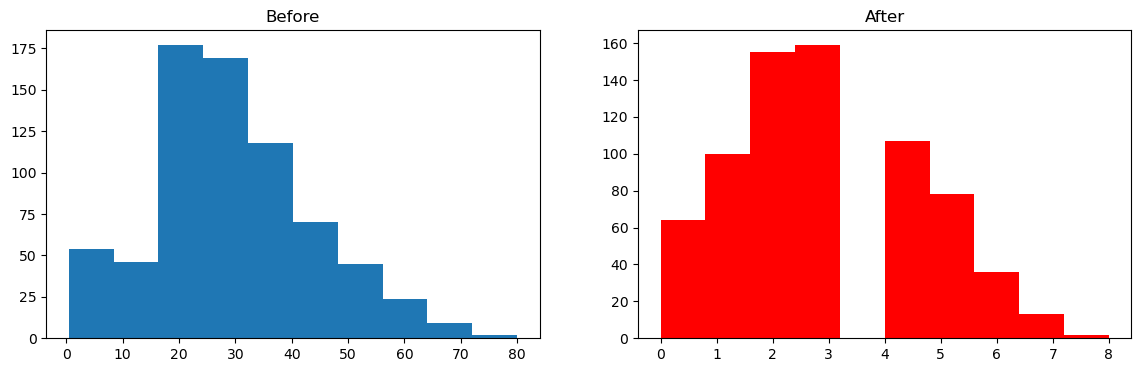

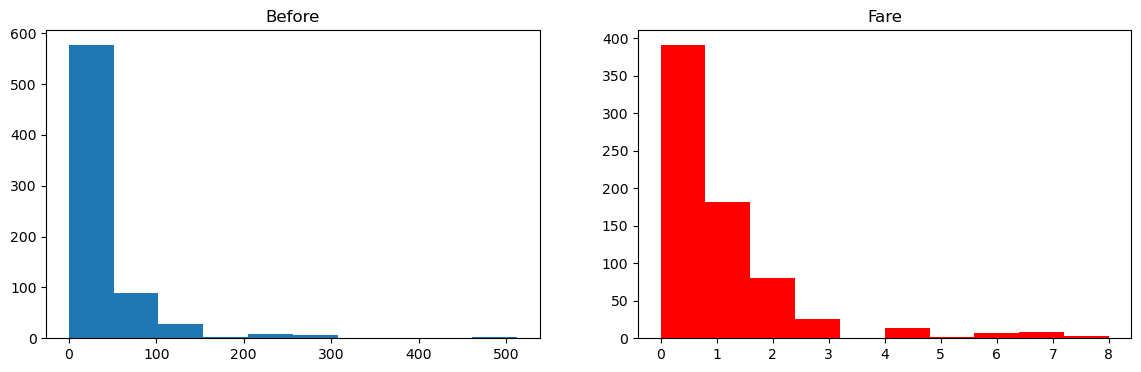

In [85]:
discretize(9,'kmeans')